<a href="https://colab.research.google.com/github/afifrizkyandika11551100310/IF5021_UAS_DATA_JAWA_BARAT/blob/main/235231034_M_Afif_Rizky_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ujian Akhir Semester IF5021_23521034**

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, recall_score, precision_score)

## Import Dataset

dataset kemiskinan

In [ ]:
df1 = pd.read_csv('dataset_kemiskinan.csv')
df1.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,9.97,PERSEN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.65,PERSEN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.32,PERSEN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,9.30,PERSEN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,13.94,PERSEN,2010


dataset anemia

In [ ]:
df2 = pd.read_csv('dataset_anemia.csv')
df2.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_ibu_hamil_anemia,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,7521,ORANG,2015
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,3379,ORANG,2015
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,623,ORANG,2015
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,150,ORANG,2015
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,2280,ORANG,2015


dataset pengangguran

In [ ]:
df3 = pd.read_csv('dataset_pengangguran.csv')
df3.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,persentase_tingkat_pengangguran_terbuka,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,7.87,PERSEN,2013
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,10.38,PERSEN,2013
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,14.18,PERSEN,2013
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,10.12,PERSEN,2013
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,8.14,PERSEN,2013


dataset index kesehatan

In [ ]:
df4 = pd.read_csv('dataset_indexKesehatan.csv')
df4.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,indeks_kesehatan,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,77.43,POIN,2010
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,76.10,POIN,2010
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,75.02,POIN,2010
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,81.44,POIN,2010
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,77.44,POIN,2010


## Preprocessing dataset

In [ ]:
new_df1 = df1.drop(columns = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan'])
new_df2 = df2.drop(columns = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan'])
new_df3 = df3.drop(columns = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan'])
new_df4 = df4.drop(columns = ['id', 'kode_provinsi', 'nama_provinsi', 'satuan'])

sample new dataset

In [ ]:
# sample
new_df1.head(2)

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,tahun
0,3201,KABUPATEN BOGOR,9.97,2010
1,3202,KABUPATEN SUKABUMI,10.65,2010


In [ ]:
# check dimension
new_df1.shape

(292, 4)

## Merge Dataset

In [ ]:
full_dataset = new_df1.merge(new_df2, how='left').merge(new_df3, how = 'left').merge(new_df4, how = 'left')
full_dataset.tail()

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,tahun,jumlah_ibu_hamil_anemia,persentase_tingkat_pengangguran_terbuka,indeks_kesehatan
287,3275,KOTA BEKASI,4.38,2020,1614.0,10.68,84.6
288,3276,KOTA DEPOK,2.45,2020,3496.0,9.87,83.8
289,3277,KOTA CIMAHI,5.11,2020,332.0,13.30,83.1
290,3278,KOTA TASIKMALAYA,12.97,2020,1265.0,7.99,80.2
291,3279,KOTA BANJAR,6.09,2020,578.0,6.73,78.4


## Visualization

**berikut akan ditampilkan beberapa visualisasi yang melibatkan data yang sudah dipreprocessing diatas**

### **1. Visualisasikan berapa banyak data kosong yang terdapat pada data diatas**

untuk melakukan visualisasi data yang kosong dapat menggunakan library missingNo sehingga dapat digambarkan secara jelas berapa banyak missing value yang terdapat pada data diatas

kode_kabupaten_kota                          0
nama_kabupaten_kota                          0
persentase_penduduk                          0
tahun                                        0
jumlah_ibu_hamil_anemia                    130
persentase_tingkat_pengangguran_terbuka    105
indeks_kesehatan                             0
dtype: int64


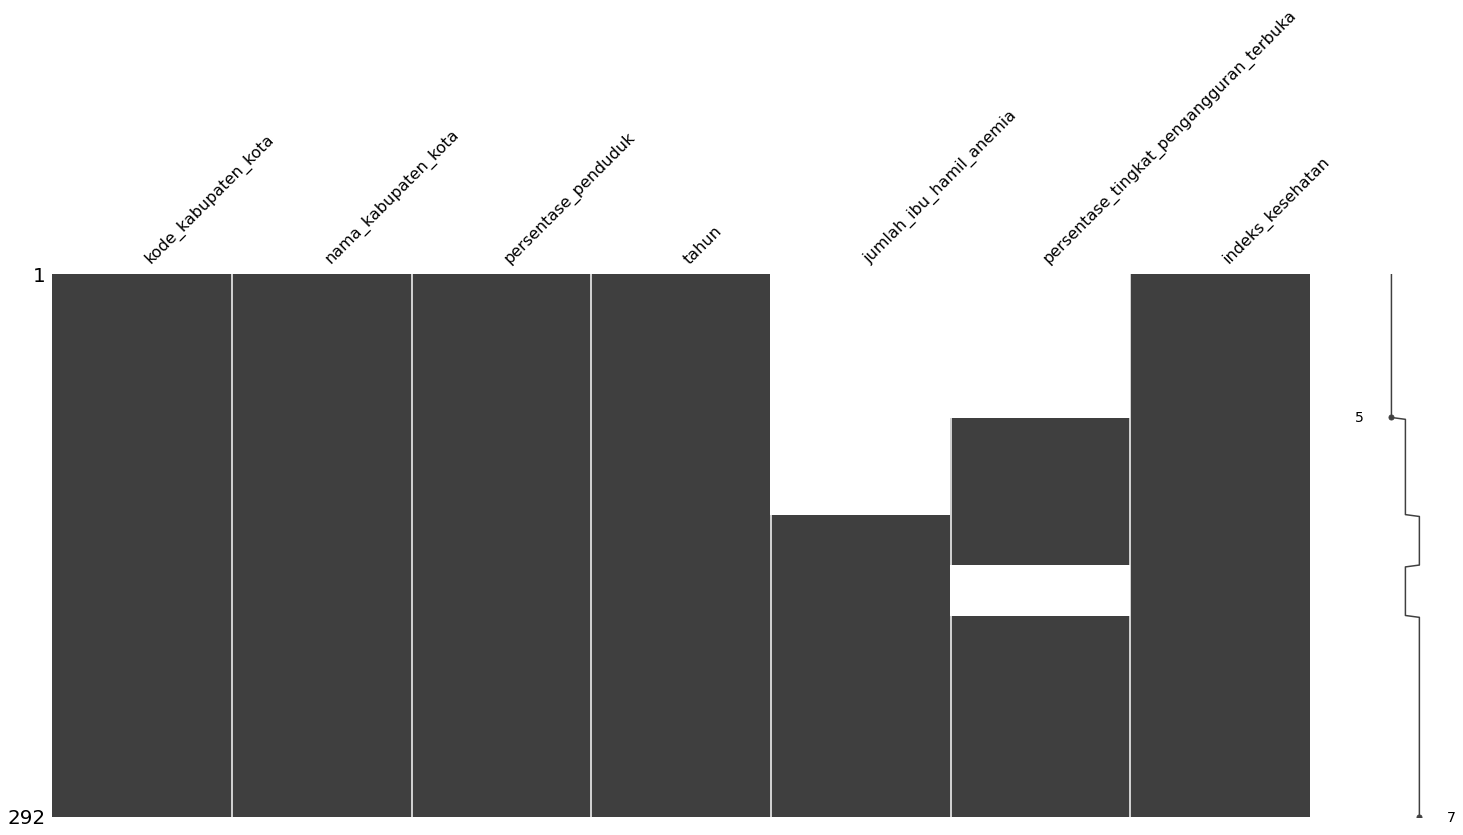

In [ ]:
import missingno as msno
ax = msno.matrix(full_dataset)
ax
print(full_dataset.isnull().sum())

terlihat pada gambar diatas bahwa terdapat missing value yang cukup signifikan pada feature jumlah ibu hamil (130 missing value) dan persentase tingkat pengangguran terbuka (105 missing value) pada tahun tertentu hal ini disebabkan merge yang dilakukan pada dataset menggunakan keys pada dataset sebelah kiri

### **2. Gambarkan korelasi dari masing - masing feature diatas**

In [ ]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   kode_kabupaten_kota                      292 non-null    int64  
 1   nama_kabupaten_kota                      292 non-null    object 
 2   persentase_penduduk                      292 non-null    float64
 3   tahun                                    292 non-null    int64  
 4   jumlah_ibu_hamil_anemia                  162 non-null    float64
 5   persentase_tingkat_pengangguran_terbuka  187 non-null    float64
 6   indeks_kesehatan                         292 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 18.2+ KB


In [ ]:
set_correlation = full_dataset[['persentase_penduduk', 'jumlah_ibu_hamil_anemia', 'persentase_tingkat_pengangguran_terbuka', 'indeks_kesehatan']]

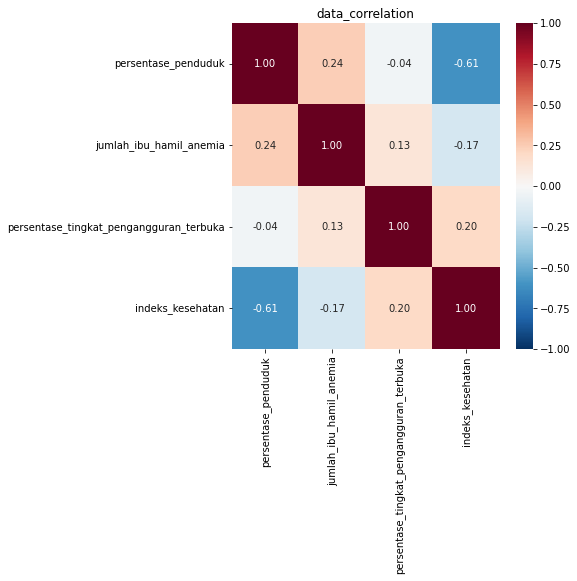

In [ ]:
fig, ax  = plt.subplots(figsize = (6,6))
ax = heatmap(set_correlation.corr(),fmt = '.2f', annot=True, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1).set(title = 'data_correlation')

dapat dilihat pada hasil diatas bahwa terdapat feature yang berkorelasi:
 * **positif kuat** (contoh: persentase penduduk miskin dengan jumlah ibu hamil) menandakan bahwa ketika penduduk miskin bertambah banyak maka, jumlah ibu hamil dengan kondisi anemia akan bertambah banyak 
 * **negatif kuat** (contoh: persentase penduduk miskin dengan index kesehatan) manandakan bahwa ketika jumlah penduduk miskin berkurang maka index kesehatan juga ikut berkurang/semakin banyak orang yang tidak sehat
 * **non-correlation** ini bisa diasumsikan korelasi masing - masing feature adalah 0 atau mendekati 0 (contoh: index pengangguran dan persentase ibu hamil kondisi anemia) menandakan bahwa hampir tidak ada korelasi bahwa semakin banyak atau semakin sedikit pengangguran mempengaruhi persentase ibu hamil dengan kondisi amenia

### **3. Visualisasikan jumlah index pengangguran setiap tahun**

In [ ]:
full_dataset.head(2)

,kode_kabupaten_kota,nama_kabupaten_kota,persentase_penduduk,tahun,jumlah_ibu_hamil_anemia,persentase_tingkat_pengangguran_terbuka,indeks_kesehatan
0,3201,KABUPATEN BOGOR,9.97,2010,NaN,NaN,77.43
1,3202,KABUPATEN SUKABUMI,10.65,2010,NaN,NaN,76.10


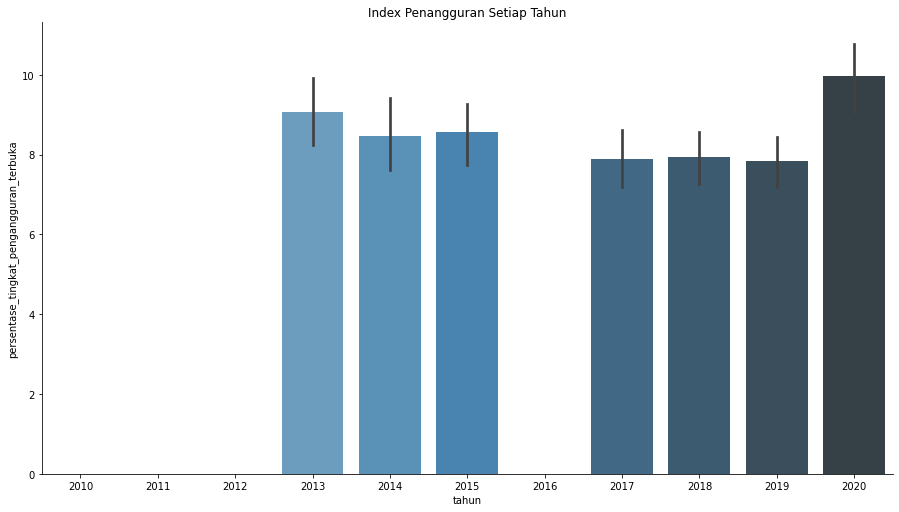

In [ ]:
ax = sns.catplot(x="tahun", 
                 y="persentase_tingkat_pengangguran_terbuka", 
                 data=full_dataset,  
                 palette="Blues_d", 
                 height=7, 
                 aspect=1.8, 
                 kind="bar").set(title ='Index Penangguran Setiap Tahun')

berdasarkan hasil diatas dapat dilihat bahwa pada tahun 2020 terdapat pengangguran yang sangat tinggi dibandingkan dengan tahun - tahun lainnya sedangkan tingkat penangguran paling rendah terdapat pada tahun 2017

### 4. Visualisasi kabupaten dengan index penagguran terendah

In [ ]:
terendah = full_dataset.sort_values(by = 'persentase_tingkat_pengangguran_terbuka', ascending=True).head(25)

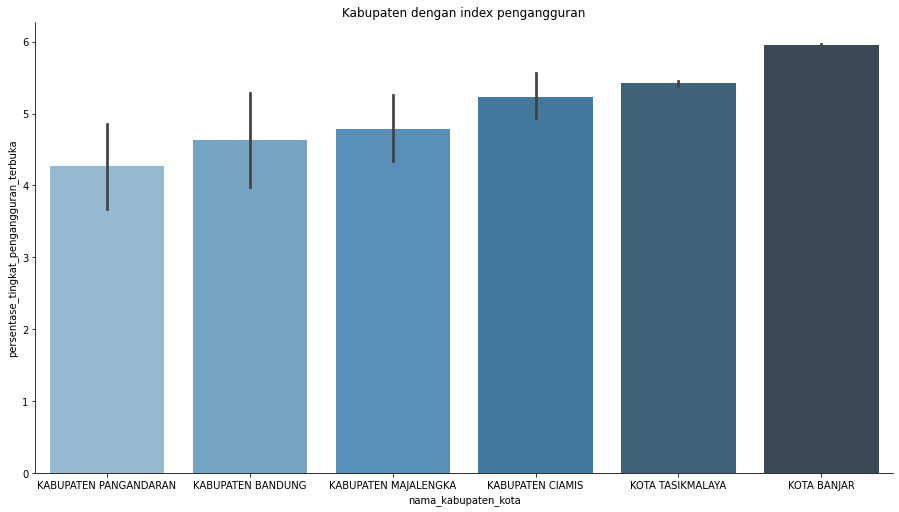

In [ ]:
 ax = sns.catplot(x="nama_kabupaten_kota", 
                 y="persentase_tingkat_pengangguran_terbuka", 
                 data=terendah,
                 palette="Blues_d", 
                 height=7, 
                 aspect=1.8, 
                 kind="bar").set(title ='Kabupaten dengan index pengangguran')

dapat dilihat pada hasil diatas menunjukkan bahwa kabupaten pananggaran memiliki index prestasi pengangguran paling rendah dibandingkan kabupaten kabupaten lainnya